In [ ]:
"""
Total: 21/22
"""

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [72]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [2]:
"""
Mark:2/2
"""
f = lambda x: (x**3 + 5*x - 20)/ (x**2+3)
g = lambda x: (x - 1/3)*(x**4 - 3)**0.5
A = quad(f,0,2)[0]
B = quad(g,3,5)[0]
print('A: ',A,'B:',B)

A:  -7.049316535735796 B: 124.40877284192784


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [3]:
"""
Mark:2/2
"""
def func(z,t):
    x1,x2,x3 = z
    dx1dt = -1/2*x1
    dx2dt = (1/2 * x1) - (1/4 *x2)
    dx3dt = (1/4 * x2) - (1/6 * x3)
    return np.array([dx1dt,dx2dt,dx3dt])
z0 = [1,1,1]
t = np.linspace(0,4,200)
Z = odeint(func, z0,t)

x1 = Z[:,0]
x2 = Z[:,1]
x3 = Z[:,2]
#print(Z)

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


Text(0, 0.5, 'er1(t)')

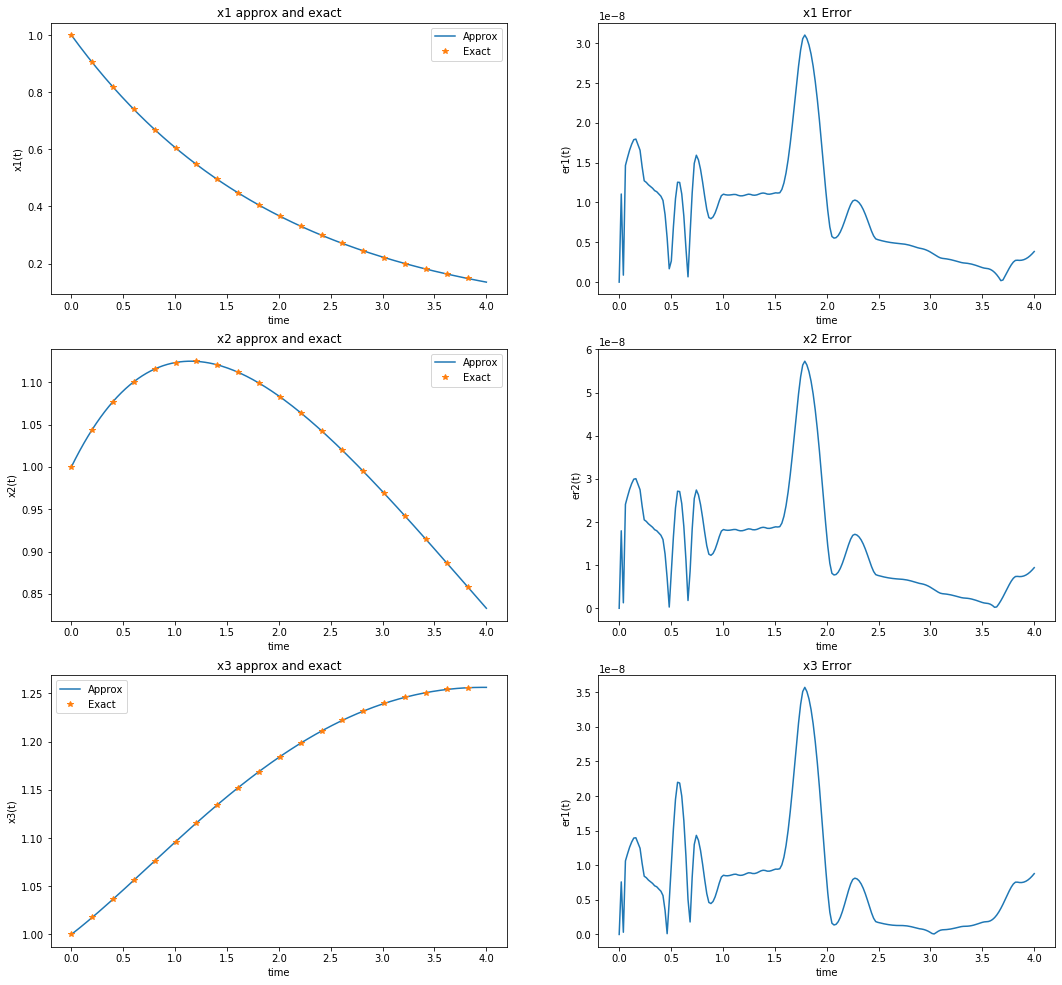

In [4]:
"""
Mark:3/3
"""
h1 = np.exp(-t/2)
h2 = -2*np.exp(-t/2) + 3*np.exp(-t/4)
h3 = (3/2)*np.exp(-t/2) - 9*np.exp(-t/4) + (17/2)*np.exp(-t/6)

er1 = abs(x1-h1)
er2 = abs(x2-h2)
er3 = abs(x3-h3)

plt.figure(figsize=(18,17))
plt.subplot(3,2,1)
plt.plot(t,x1)
plt.plot(t[::10],h1[::10],'*')
plt.title('x1 approx and exact')
plt.legend(['Approx', 'Exact'])
plt.xlabel('time')
plt.ylabel('x1(t)')
plt.subplot(3,2,2)
plt.plot(t,er1)
plt.title('x1 Error')
plt.xlabel('time')
plt.ylabel("er1(t)")

plt.subplot(3,2,3)
plt.plot(t,x2)
plt.plot(t[::10],h2[::10],'*')
plt.title('x2 approx and exact')
plt.legend(['Approx', 'Exact'])
plt.xlabel('time')
plt.ylabel('x2(t)')
plt.subplot(3,2,4)
plt.plot(t,er2)
plt.title('x2 Error')
plt.xlabel('time')
plt.ylabel("er2(t)")

plt.subplot(3,2,5)
plt.plot(t,x3)
plt.plot(t[::10],h3[::10],'*')
plt.title('x3 approx and exact')
plt.legend(['Approx', 'Exact'])
plt.xlabel('time')
plt.ylabel('x3(t)')
plt.subplot(3,2,6)
plt.plot(t,er3)
plt.title('x3 Error')
plt.xlabel('time')
plt.ylabel("er1(t)")



$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [6]:
"""
Mark:2/2
"""
def EulerOdeSys(f,c,t):
    
    H = t[2]-t[1]
    N = len(t)
    M = len(c)
    Z = np.zeros((N,M))
    Z[0] = c
    
    for k in range (0,N-1):
        Z[k+1] = Z[k]+ H* f(Z[k],t[k])
    
    return Z
Z

array([[1.        , 1.        , 1.        ],
       [0.99000007, 1.00496229, 1.00168474],
       [0.98010016, 1.00979992, 1.00338844],
       [0.97029926, 1.01451455, 1.0051104 ],
       [0.96059635, 1.0191078 , 1.00684994],
       [0.95099047, 1.02358125, 1.00860641],
       [0.94148064, 1.02793646, 1.01037915],
       [0.93206592, 1.03217497, 1.01216751],
       [0.92274534, 1.03629834, 1.01397086],
       [0.91351796, 1.04030806, 1.01578859],
       [0.90438286, 1.04420565, 1.01762006],
       [0.8953391 , 1.04799258, 1.01946469],
       [0.88638578, 1.05167032, 1.02132187],
       [0.877522  , 1.05524031, 1.02319102],
       [0.86874685, 1.058704  , 1.02507156],
       [0.86005946, 1.06206279, 1.02696292],
       [0.85145894, 1.06531809, 1.02886455],
       [0.84294442, 1.06847129, 1.03077589],
       [0.83451504, 1.07152375, 1.0326964 ],
       [0.82616996, 1.07447682, 1.03462555],
       [0.81790833, 1.07733186, 1.03656282],
       [0.80972932, 1.08009018, 1.03850769],
       [0.

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [7]:
"""
Mark:2/2
"""
def RK4OdeSys(f,c,t):
    
    H = t[2]-t[1]
    N = len(t)
    M = len(c)
    Z = np.zeros((N,M))
    Z[0] = c
    
    for k in range (0,N-1):
        k1 = f(Z[k],t[k])
        k2 = f(Z[k] + H*k1/2,t[k] + H/2)
        k3 = f(Z[k] + H*k2/2,t[k] + H/2)
        k4 = f(Z[k] + H*k3,t[k] + H)
        Z[k+1] = Z[k] + H/6*(k1+ 2*k2 + 2*k3 + k4)
    return Z


array([[1.        , 1.        , 1.        ],
       [0.99000007, 1.00496229, 1.00168474],
       [0.98010016, 1.00979992, 1.00338844],
       [0.97029926, 1.01451455, 1.0051104 ],
       [0.96059635, 1.0191078 , 1.00684994],
       [0.95099047, 1.02358125, 1.00860641],
       [0.94148064, 1.02793646, 1.01037915],
       [0.93206592, 1.03217497, 1.01216751],
       [0.92274534, 1.03629834, 1.01397086],
       [0.91351796, 1.04030806, 1.01578859],
       [0.90438286, 1.04420565, 1.01762006],
       [0.8953391 , 1.04799258, 1.01946469],
       [0.88638578, 1.05167032, 1.02132187],
       [0.877522  , 1.05524031, 1.02319102],
       [0.86874685, 1.058704  , 1.02507156],
       [0.86005946, 1.06206279, 1.02696292],
       [0.85145894, 1.06531809, 1.02886455],
       [0.84294442, 1.06847129, 1.03077589],
       [0.83451504, 1.07152375, 1.0326964 ],
       [0.82616996, 1.07447682, 1.03462555],
       [0.81790833, 1.07733186, 1.03656282],
       [0.80972932, 1.08009018, 1.03850769],
       [0.

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [10]:
"""
Mark:2/2
"""
def f(z,t):
    x1,x2,x3 = z
    dx1dt = -1/2*x1
    dx2dt = (1/2 * x1) - (1/4 *x2)
    dx3dt = (1/4 * x2) - (1/6 * x3)
    return np.array([dx1dt,dx2dt,dx3dt])
c = [1,1,1]
t = np.linspace(0,4,200)
Z = odeint(func, z0,t)

ZE = EulerOdeSys(f,c,t)
ZR = RK4OdeSys(f,c,t)

#print('Euler:',ZE,'RK4',ZR)

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

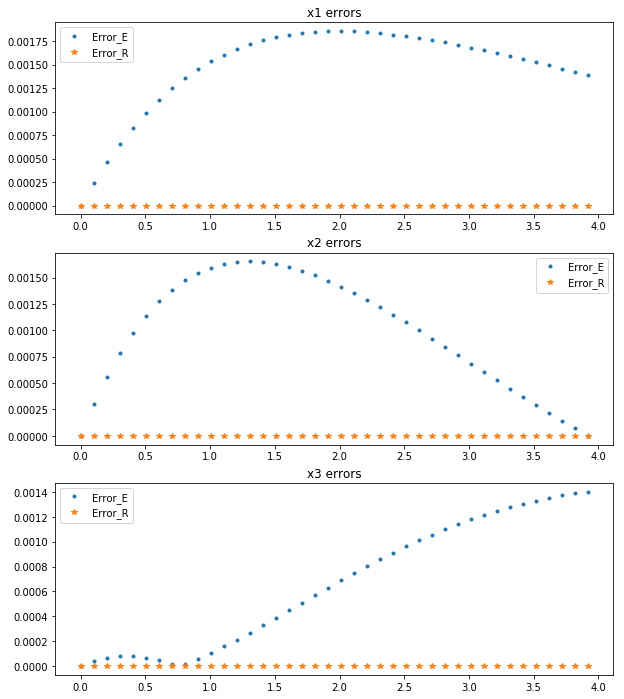

In [80]:
"""
Mark:2/3
Comment : Conclusion?
"""
x1e = ZE[:,0]
x2e = ZE[:,1]
x3e = ZE[:,2]
ee1 =abs(x1e - h1)
ee2 =abs(x2e - h2)
ee3 =abs(x3e - h3)
x1r = ZR[:,0]
x2r = ZR[:,1]
x3r = ZR[:,2]
e1r =abs(x1r - h1)
e2r =abs(x2r - h2)
e3r =abs(x3r - h3)

plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.plot(t[::5],ee1[::5],'.')
plt.plot(t[::5],er1[::5],'*')
plt.legend(['Error_E','Error_R'])
plt.title('x1 errors')

plt.subplot(3,1,2)
plt.plot(t[::5],ee2[::5],'.')
plt.plot(t[::5],er2[::5],'*')
plt.legend(['Error_E','Error_R'])
plt.title('x2 errors')

plt.subplot(3,1,3)
plt.plot(t[::5],ee3[::5],'.')
plt.plot(t[::5],er3[::5],'*')
plt.legend(['Error_E','Error_R'])
plt.title('x3 errors')

# plt.plot(t,er1)
plt.show()


$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [2]:
"""
Mark:2/2
"""

def MatGenerator(a,b,K,α,β,N,g):
    H = (b-a)/N
    A=np.zeros((N+1,N+1))
    B=np.zeros((N+1))
    A[0,0]=1
    A[N,N]=1
    B[0]= α
    B[N]= β
    x = np.linspace(a,b,N+1) 
    for i in range (1,N):
        A[i,i-1]=-K/(H**2)
        A[i,i]=2*(K/(H**2))
        A[i,i+1]=-K/(H**2) 
        B[i] = g(x[i])
    return A,B
    
    


2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [5]:
"""
Mark:2/2
"""
a=0
b=1
α=-4
β=0
K=1
N=100
g= lambda x:-4*(1+x)*np.exp(x)
Z,Y = MatGenerator(a,b,K,α,β,N,g)

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x

- the absolute error between the exact and the approximate solution against x

Text(0.5, 1.0, 'Error')

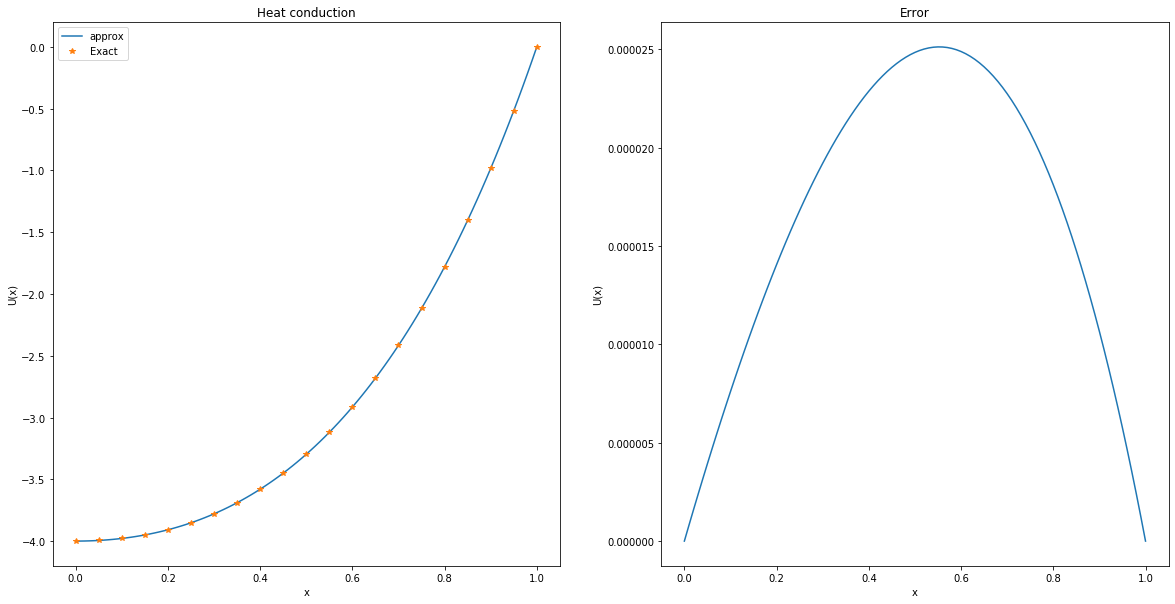

In [7]:
"""
Mark:2/2
"""
U = np.linalg.solve(Z,Y)
x = np.linspace(a,b,N+1)
D = 4*(x-1)*np.exp(x)

E=abs(U-D)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(x,U)
plt.plot(x[::5],D[::5],'*')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.title('Heat conduction')
plt.legend(['approx','Exact'])

plt.subplot(1,2,2)
plt.plot(x,E)
plt.xlabel('x')
plt.ylabel('U(x)')
plt.title('Error')
